In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import numpy as np
from scipy.stats import sem

In [2]:
#This is the full data frame with some extra columns removed
health_df = pd.read_csv("Resources/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
health_df = health_df.drop(columns = ["Data As Of", "Start Date", "End Date", "Footnote"])
health_df.head()

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,By Total,NaN,NaN,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,962.0,75444.0,1520.0,258.0,206.0,2427.0
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0


In [3]:
#I have removed some random age groups
age_adjusted_df = health_df.loc[(health_df["Age Group"] != "40-49 years") &
                                (health_df["Age Group"] != "30-39 years") &
                                (health_df["Age Group"] != "18-29 years") &
                                (health_df["Age Group"] != "0-17 years") &
                                (health_df["Age Group"] != "50-64 years"), :]

In [4]:
#This data frame shows deaths regardless of Year and Month
#This data frame can be sorted by State, Sex, and Age Group
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
total_df = age_adjusted_df.loc[health_df["Group"] == "By Total", :]
total_df = total_df.drop(columns = ["Year", "Month", "Group"])
total_df.head()

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
3,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0
5,United States,All Sexes,15-24 years,2592.0,81010.0,2260.0,1144.0,98.0,3798.0


In [5]:
#This data frame shows deaths by year, regardless of Month.
#You can pick 2020, 2021, or 2022
#This data frame can be sorted by State, Sex, and Age Group
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
year_df = age_adjusted_df.loc[health_df["Group"] == "By Year", :]
year_df = year_df.drop(columns = ["Month", "Group"])
year_df = year_df.replace("New York City", "New York")
year_df.head()

,Year,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
2754,2020.0,United States,All Sexes,All Ages,385480.0,3389057.0,351879.0,179994.0,8785.0,564999.0
2755,2020.0,United States,All Sexes,Under 1 year,52.0,19608.0,241.0,9.0,21.0,305.0
2757,2020.0,United States,All Sexes,1-4 years,25.0,3527.0,132.0,4.0,61.0,214.0
2758,2020.0,United States,All Sexes,5-14 years,69.0,5639.0,172.0,12.0,76.0,305.0
2759,2020.0,United States,All Sexes,15-24 years,616.0,35961.0,773.0,223.0,80.0,1241.0


In [6]:
#This data frame shows deaths by Month.
#You can pick any month numerically (ex. January = 1.0)
#This data frame can be sorted by Year, State, Sex, and Age Group
#Year: You can pick 2020, 2021, or 2022
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
month_df = age_adjusted_df.loc[health_df["Group"] == "By Month", :]
month_df = month_df.drop(columns = "Group")
month_df = month_df.replace("New York City", "New York")
month_df.head()

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11016,2020.0,1.0,United States,All Sexes,All Ages,5.0,264658.0,17909.0,3.0,2125.0,20036.0
11017,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1781.0,41.0,0.0,8.0,49.0
11019,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0
11020,2020.0,1.0,United States,All Sexes,5-14 years,0.0,471.0,21.0,0.0,29.0,50.0
11021,2020.0,1.0,United States,All Sexes,15-24 years,0.0,2596.0,57.0,0.0,28.0,85.0


In [7]:
men = year_df["Sex"] == "Men"
print(f"There are {men.count()} men in the dataframe.")
      
women = year_df["Sex"] == "Women"
print(f"There are {women.count()} women in the dataframe.")    

There are 5832 men in the dataframe.
There are 5832 women in the dataframe.


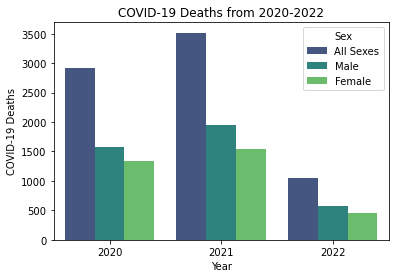

In [8]:
ax = sns.barplot(data = year_df, x="Year", y = "COVID-19 Deaths", hue = "Sex", ci=None, palette="viridis")
plt.title("COVID-19 Deaths from 2020-2022")
ax.set_xticklabels(["2020", "2021", "2022"])
plt.savefig("Resources/Images/CovidDeathsBySexAndYear.png")
plt.show()

#This plot shows that more men have died from COVID than women because
#the above line of code states there are an equal number of men and women in the dataframe.
#The most people died in 2021, but it was the only time we have an entire year's data.

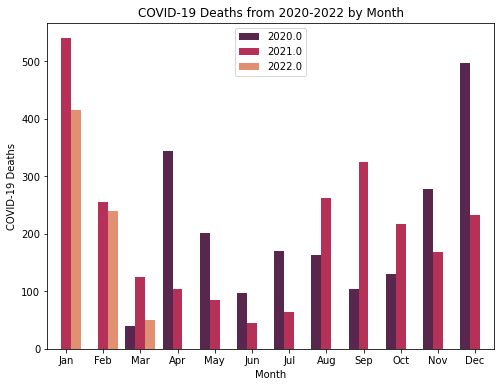

In [9]:
#The most COVID deaths occurred in Dec 2020 and Jan 2021. 
#From Feb - Jun 2021, there was a steady decline as vaccines became available.

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

f, ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = month_df, x="Month", y = "COVID-19 Deaths", 
                 hue = "Year", ci=None, palette="rocket")
ax.set_xticklabels(months)
ax.set_title("COVID-19 Deaths from 2020-2022 by Month")
plt.legend(loc="upper center")
plt.savefig("Resources/Images/CovidDeathsByMonth.png")
plt.show()

In [10]:
total_deaths = total_df.iloc[0, :]
total_deaths_df = pd.DataFrame(index = [0,1,2])
total_deaths_df["Disease Type"] = ["COVID-19", "Pneumonia", "Influenza"]
total_deaths_df["Total Deaths (by thousands)"] = [total_deaths["COVID-19 Deaths"] / 1000,
                                                  total_deaths["Pneumonia Deaths"] / 1000,
                                                  total_deaths["Influenza Deaths"] / 1000]

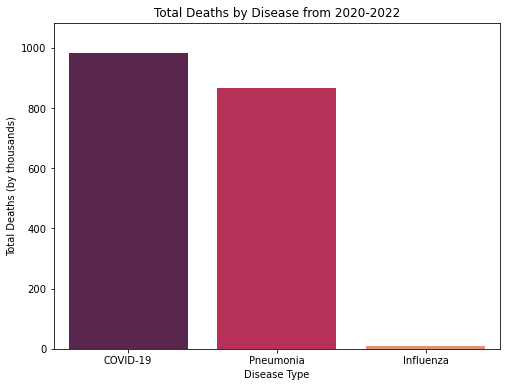

In [11]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = total_deaths_df, x = "Disease Type", y = "Total Deaths (by thousands)", 
                  ci=None, palette="rocket")
ax.set_title("Total Deaths by Disease from 2020-2022")
plt.ylim([0, total_deaths_df["Total Deaths (by thousands)"].max() + 100])
plt.rc('axes', labelsize=16, titlesize=16) 
plt.savefig("Resources/Images/TotalDeaths.png")
plt.show()

#This graph shows the total deaths by Disease from the start of 2020.
#There were significantly more COVID-19 and Pneumonia deaths than Influenza deaths.

In [12]:
year = [2020.0, 2021.0, 2022.0]
covid = []
pneumonia = []
influenza = []
for x in year:
    deaths = year_df.loc[(year_df["Year"] == x) & (year_df["State"] == "United States") &
                        (year_df["Sex"] == "All Sexes") & (year_df["Age Group"] == "All Ages")]
    covid.append(deaths["COVID-19 Deaths"] / 1000)
    pneumonia.append(deaths["Pneumonia Deaths"] / 1000)
    influenza.append(deaths["Influenza Deaths"] / 1000)
yearly_deaths_df = pd.DataFrame(index = range(0, 9))
yearly_deaths_df["Year"] = ["2020", "2020", "2020", "2021", "2021", "2021", "2022", "2022", "2022"]
yearly_deaths_df["Disease Type"] = ["COVID-19", "COVID-19", "COVID-19", "Pneumonia", "Pneumonia", "Pneumonia",
                                   "Influenza", "Influenza", "Influenza"]
yearly_deaths_df["Total Deaths (by thousands)"] = ""
for x in range(len(covid)):
    yearly_deaths_df.iloc[x, 2] = covid[x]
    yearly_deaths_df.iloc[x + 3, 2] = pneumonia[x]
    yearly_deaths_df.iloc[x + 6, 2] = influenza[x]

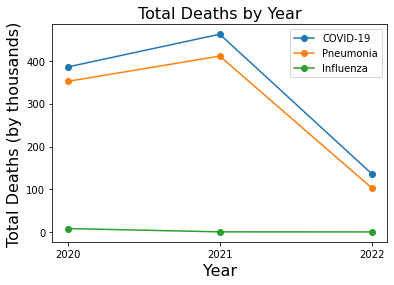

In [13]:
x_values = ["2020", "2021", "2022"]
y_covid = yearly_deaths_df.loc[yearly_deaths_df["Disease Type"] == "COVID-19", :]
y_pneumonia = yearly_deaths_df.loc[yearly_deaths_df["Disease Type"] == "Pneumonia", :]
y_influenza = yearly_deaths_df.loc[yearly_deaths_df["Disease Type"] == "Influenza", :]
covid_handle, = plt.plot(x_values, y_covid["Total Deaths (by thousands)"], marker = 'o', label = "COVID-19")
pneumonia_handle, = plt.plot(x_values, y_pneumonia["Total Deaths (by thousands)"],  marker = 'o', 
                             label = "Pneumonia")
influenza_handle, = plt.plot(x_values, y_influenza["Total Deaths (by thousands)"],  marker = 'o',
                            label = "Influenza")
plt.title("Total Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths (by thousands)")
plt.legend()
plt.savefig("Resources/Images/TotalDeathsByYear.png")
plt.show()

#This graph shows that COVID-19 and Pneumonia deaths dropped significantly in 2022 and the 
#number of Influenza deaths has stayed steady

In [14]:
age_groups = total_df["Age Group"].unique()
covid_age = []
pneumonia_age = []
influenza_age = []
age_deaths_df = pd.DataFrame(index = range(0, 36))
age_deaths_df["Age Group"] = ""
age_deaths_df["Disease Type"] = ""
age_deaths_df["Total Deaths (by thousands)"] = ""
for age in range(len(age_groups)):
    deaths_age = total_df.loc[(total_df["State"] == "United States") &
                    (total_df["Sex"] == "All Sexes") & (total_df["Age Group"] == age_groups[age])]
    covid_age.append(deaths_age["COVID-19 Deaths"] / 1000)
    pneumonia_age.append(deaths_age["Pneumonia Deaths"] / 1000)
    influenza_age.append(deaths_age["Influenza Deaths"] / 1000)
    age_deaths_df.iloc[range(age * 3, (age*3)+3), 0] = age_groups[age]
    age_deaths_df.iloc[age * 3, 1] = "COVID-19"
    age_deaths_df.iloc[(age*3)+1, 1] =  "Pneumonia"
    age_deaths_df.iloc[(age*3)+2, 1] =  "Influenza"
    age_deaths_df.iloc[age * 3, 2] = deaths_age["COVID-19 Deaths"] / 1000
    age_deaths_df.iloc[(age*3)+1, 2] = deaths_age["Pneumonia Deaths"] / 1000
    age_deaths_df.iloc[(age*3)+2, 2] = deaths_age["Influenza Deaths"] / 1000
age_deaths_df = age_deaths_df.loc[age_deaths_df["Age Group"] != "All Ages"]
covid_age_deaths_df = age_deaths_df.loc[age_deaths_df["Disease Type"] == "COVID-19"]

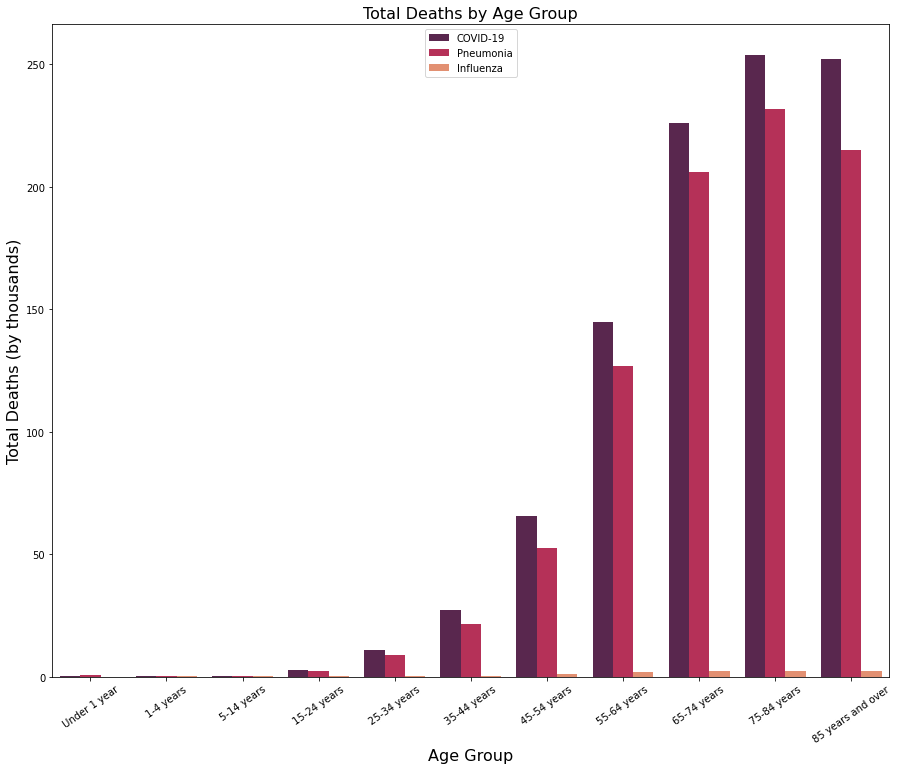

In [15]:
f, ax = plt.subplots(figsize = (15,12))
ax = sns.barplot(data = age_deaths_df, x="Age Group", y = "Total Deaths (by thousands)", 
                 hue = "Disease Type", ci=None, palette="rocket")
ax.set_xticklabels(age_groups[1:12], rotation=35)
ax.set_title("Total Deaths by Age Group")
plt.legend(loc="upper center")
plt.savefig("Resources/Images/TotalDeathsByAge.png")
plt.show()

#This graph shows that deaths caused by these diseases occured mostly in people who were 45+ years old 

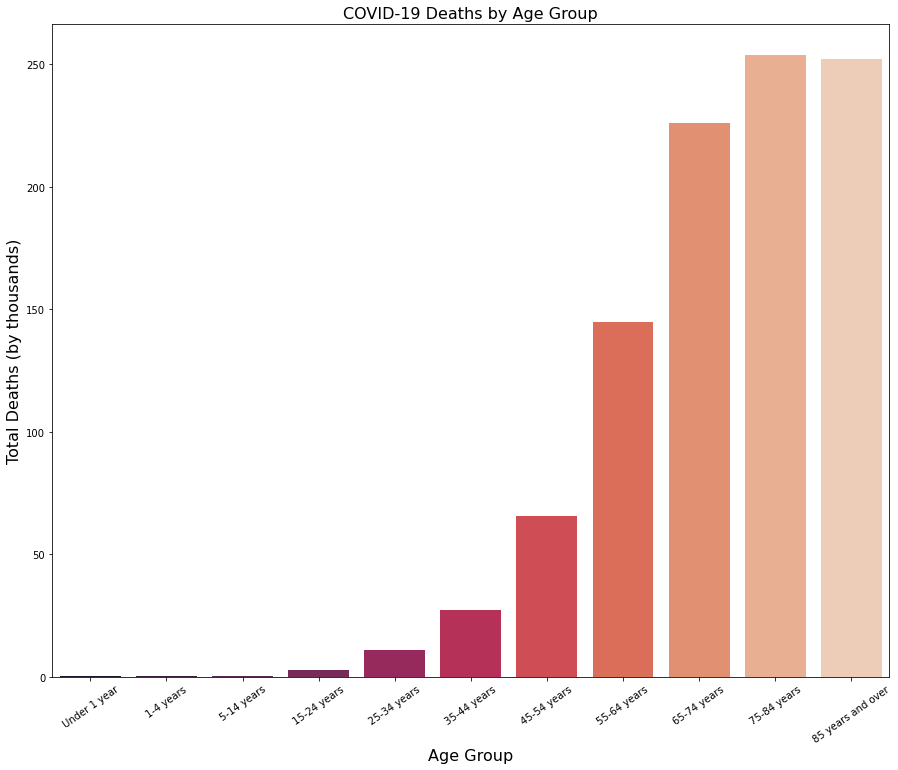

In [16]:
f, ax = plt.subplots(figsize = (15,12))
ax = sns.barplot(data = covid_age_deaths_df, x="Age Group", y = "Total Deaths (by thousands)", 
                  ci=None, palette="rocket")
ax.set_xticklabels(age_groups[1:12], rotation=35)
ax.set_title("COVID-19 Deaths by Age Group")
plt.savefig("Resources/Images/TotalDeathsByAge.png")
plt.show()

#This graph shows that deaths caused by these diseases occured mostly in people who were 45+ years old 

In [17]:
covid_age_deaths_df = age_deaths_df.loc[age_deaths_df["Disease Type"] == "COVID-19"]
covid_age_deaths_df["Age"] = range(1,12)
covid_age_deaths_df['Total Deaths (by thousands)'] = covid_age_deaths_df['Total Deaths (by thousands)'].astype('int64')

/var/folders/2m/3btzbqcn15d143__kkvb77f80000gn/T/ipykernel_4058/3400690861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_age_deaths_df["Age"] = range(1,12)
/var/folders/2m/3btzbqcn15d143__kkvb77f80000gn/T/ipykernel_4058/3400690861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_age_deaths_df['Total Deaths (by thousands)'] = covid_age_deaths_df['Total Deaths (by thousands)'].astype('int64')


The r-value is: 0.8384924226167706


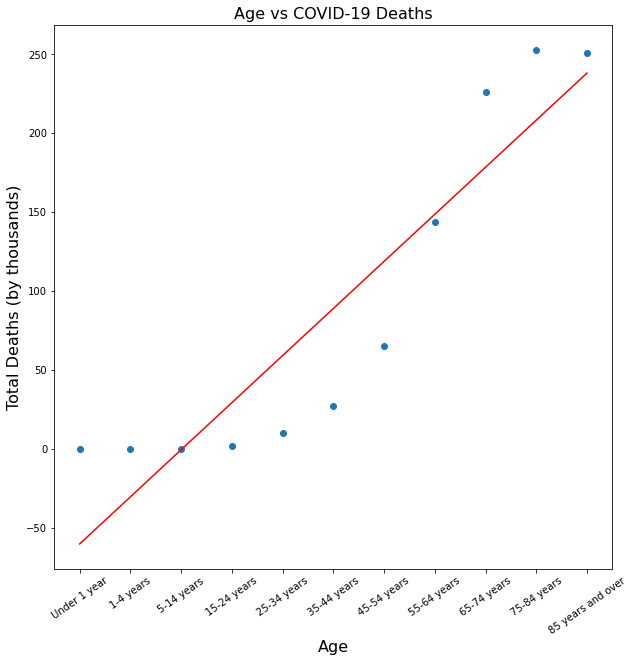

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((covid_age_deaths_df["Age"]).astype(float), 
                                                        covid_age_deaths_df["Total Deaths (by thousands)"])
regress_values = covid_age_deaths_df["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))
plt.plot(covid_age_deaths_df["Age"],regress_values,"r-")
plt.annotate(line_eq,(200, 50),fontsize=15,color="red")

unique, index = np.unique(age_groups[1:12], return_index=True)
plt.scatter(covid_age_deaths_df["Age"], covid_age_deaths_df["Total Deaths (by thousands)"])
plt.title("Age vs COVID-19 Deaths")
plt.xlabel("Age")
plt.ylabel("Total Deaths (by thousands)")
plt.xticks(range(1, len(unique) + 1), unique[index.argsort()], rotation = 35)
print(f"The r-value is: {rvalue**2}")
plt.savefig("Resources/Images/AgeVsDeaths.png")
plt.show()

#There is a strong correlation between age and number of deaths related to COVID-19, Pneumonia, and Influenza.

In [19]:
death = total_df.loc[(total_df["Sex"] == "All Sexes") & (total_df["State"] == "United States"), :]
death_covid = death.loc[death["Age Group"] == "All Ages", :]
sum_death_covid = death_covid["COVID-19 Deaths"].sum()
sum_death_covid

983409.0

In [20]:
total_death = total_df.loc[(total_df["Sex"] == "All Sexes") & (total_df["State"] == "United States"), :]
total_death_covid = total_death.loc[death["Age Group"] == "All Ages", :]
sum_death = total_death_covid["Total Deaths"].sum()
sum_death = total_deaths_df["Total Deaths (by thousands)"].sum() * 1000
sum_death

1860083.0

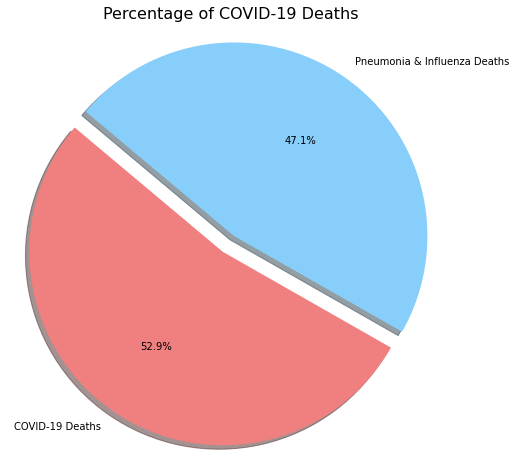

In [21]:
covidPerc = round(sum_death_covid/sum_death * 100, 2)
otherPerc = round((sum_death - sum_death_covid)/sum_death * 100, 2)

labels = ["COVID-19 Deaths", "Pneumonia & Influenza Deaths"]
colors = ["lightcoral", "lightskyblue"]
sizes = [52.87, 47.13]
explode = (0.1, 0)
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of COVID-19 Deaths")
plt.axis("equal")
plt.savefig("Resources/Images/PercentageCOVID19Deaths.png")
plt.show()

In [22]:
covid_death_by_month = month_df.loc[:, ["Year", "Month", "COVID-19 Deaths"]]

covid_death_by_month = covid_death_by_month.set_index("Month")
covid_death_by_month


,Year,COVID-19 Deaths
Month,,
1.0,2020.0,5.0
1.0,2020.0,0.0
1.0,2020.0,0.0
1.0,2020.0,0.0
1.0,2020.0,0.0
...,...,...
4.0,2022.0,0.0
4.0,2022.0,0.0
4.0,2022.0,0.0


In [23]:
covid_death_by_year = month_df.loc[:, ["Year", "COVID-19 Deaths"]]
covid_death_by_year = covid_death_by_year.groupby("Year").sum() / 1000
covid_death_by_year

,COVID-19 Deaths
Year,
2020.0,3074.824
2021.0,3681.456
2022.0,1084.186


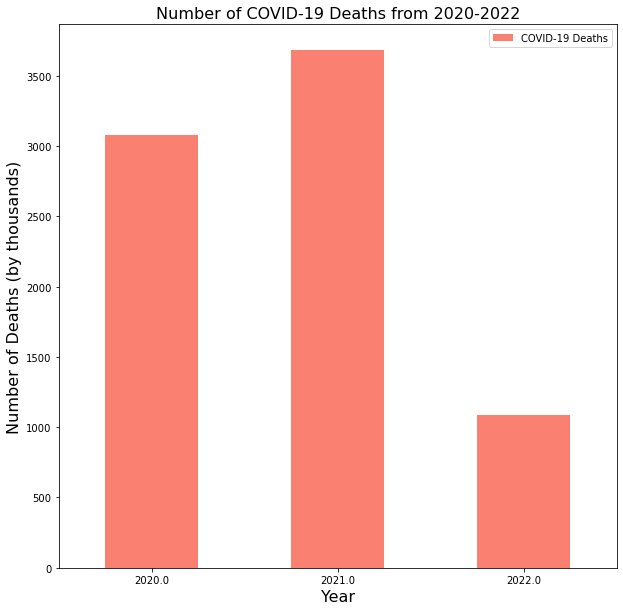

In [24]:
covid_death_by_year.plot(kind = "bar", rot=0, color = "salmon", figsize = (10,10))
plt.ylabel("Number of Deaths (by thousands)")
plt.title("Number of COVID-19 Deaths from 2020-2022")
plt.savefig("Resources/Images/COVIDdeaths.png")
plt.show()

In [25]:
flu_death_by_year = month_df.loc[:, ["Year", "Influenza Deaths"]]
flu_death_by_year = flu_death_by_year.groupby("Year").sum() / 1000
flu_death_by_year

,Influenza Deaths
Year,
2020.0,59.301
2021.0,4.835
2022.0,4.649


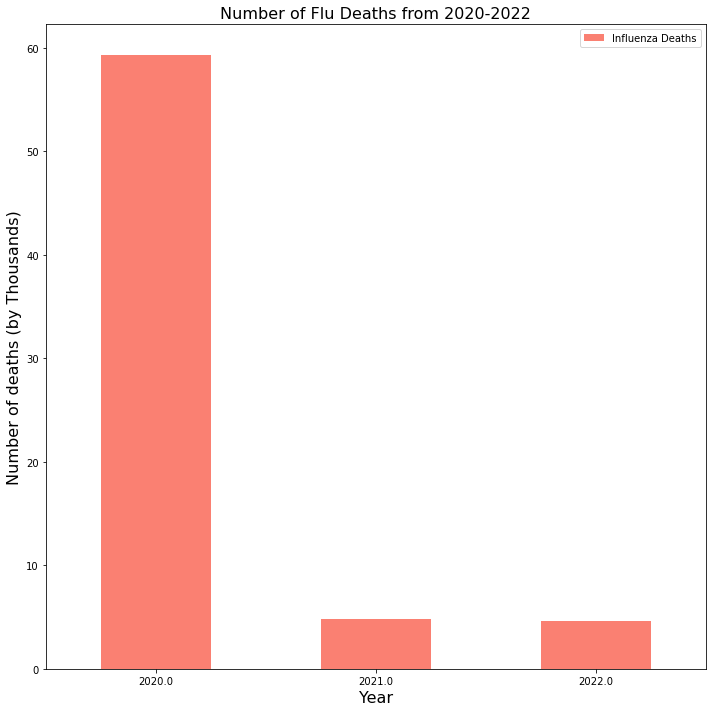

In [26]:
flu_death_by_year.plot(kind = "bar", rot=0, color = "salmon", figsize = (10,10))
plt.ylabel("Number of deaths (by Thousands)")
plt.title("Number of Flu Deaths from 2020-2022")
plt.savefig("Resources/Images/Fludeaths.png")
plt.tight_layout()
plt.show()

In [27]:
pna_death_by_year = month_df.loc[:, ["Year", "Pneumonia Deaths"]]
pna_death_by_year = pna_death_by_year.groupby("Year").sum() /1000
pna_death_by_year

,Pneumonia Deaths
Year,
2020.0,2812.549
2021.0,3284.795
2022.0,819.891


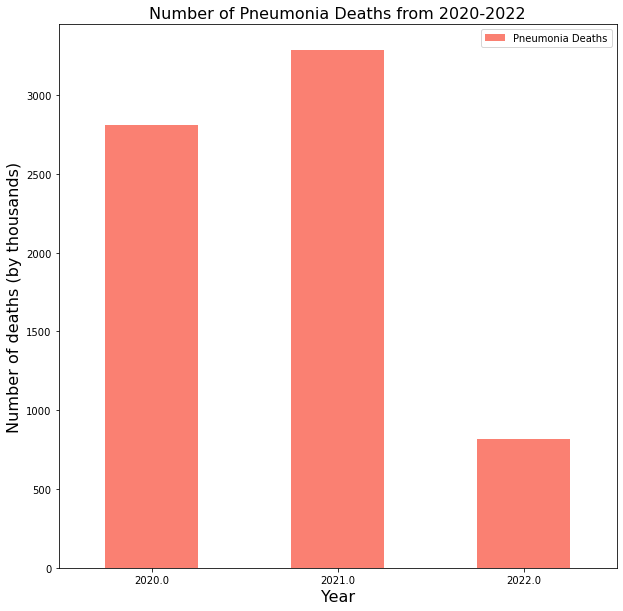

In [28]:
pna_death_by_year.plot(kind = "bar", rot=0, color = "salmon", figsize = (10,10))
plt.ylabel("Number of deaths (by thousands)")
plt.title("Number of Pneumonia Deaths from 2020-2022")
plt.savefig("Resources/Images/PNAdeaths.png")
plt.show()

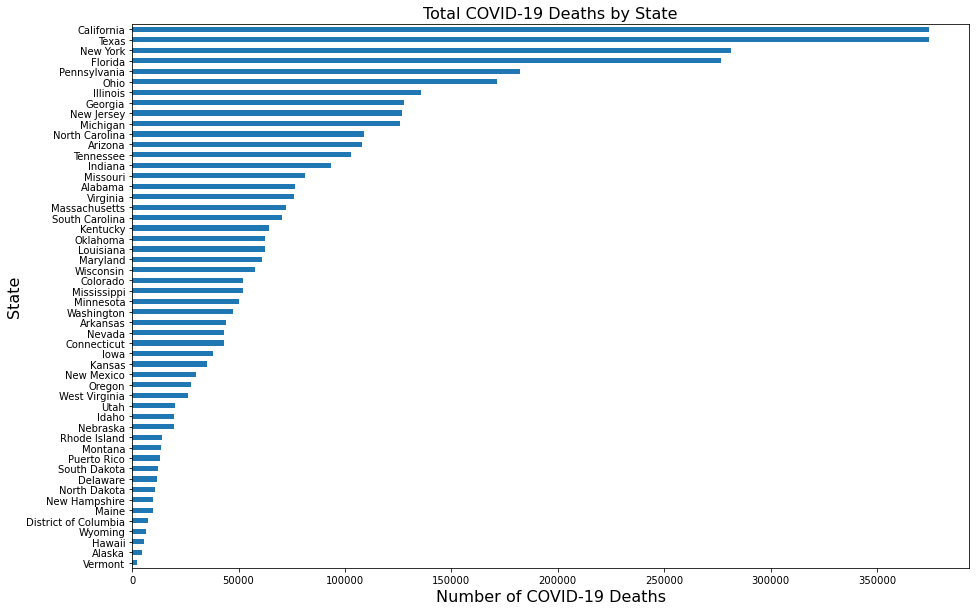

In [29]:
states_df = year_df.loc[(health_df["State"] != "United States"), :]
states_df = states_df.groupby(["State"])["COVID-19 Deaths"].sum()
states_df = states_df.sort_values(ascending = True)
states_df.plot(kind="barh", figsize = (15,10))
plt.title("Total COVID-19 Deaths by State")
plt.xlabel("Number of COVID-19 Deaths")
plt.savefig("Resources/Images/COVIDdeathbyState.png")
plt.show()

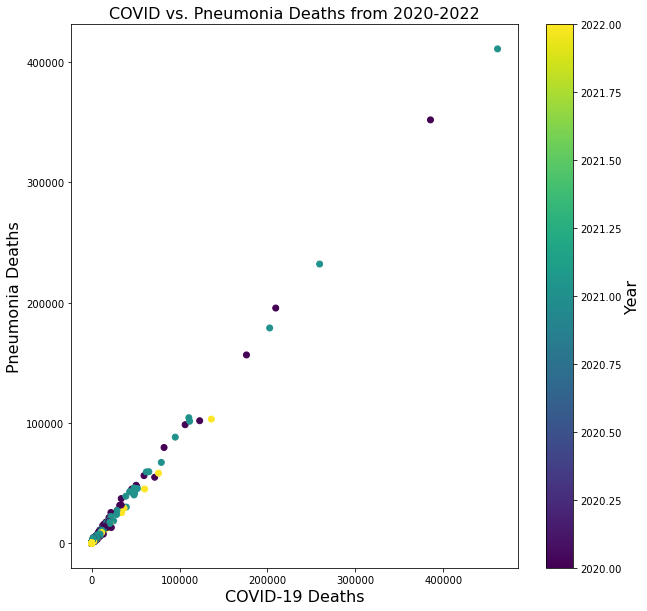

In [30]:
#Covid vs PNA deaths
plt.figure(figsize=(10,10))
plt.scatter(year_df['COVID-19 Deaths'],year_df['Pneumonia Deaths'], c=year_df['Year'])
clb = plt.colorbar()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Pneumonia Deaths")
plt.title("COVID vs. Pneumonia Deaths from 2020-2022")
clb.set_label("Year")
plt.savefig("Resources/Images/ScatterPNAvsCOVID.png")
plt.show()


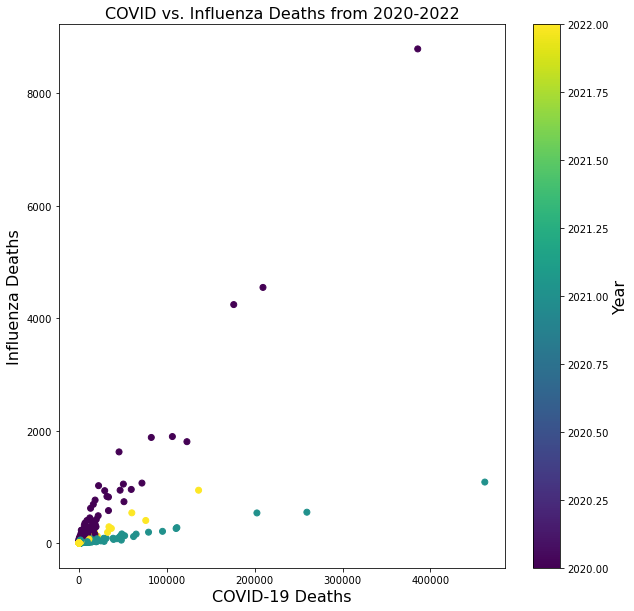

In [31]:
#Covid vs flu deaths
plt.figure(figsize=(10,10))
plt.scatter(year_df['COVID-19 Deaths'],year_df['Influenza Deaths'], c=year_df['Year'])
clb = plt.colorbar()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Influenza Deaths")
plt.title("COVID vs. Influenza Deaths from 2020-2022")
clb.set_label("Year")
plt.savefig("Resources/Images/ScatterFluvsCOVID.png")
plt.show()

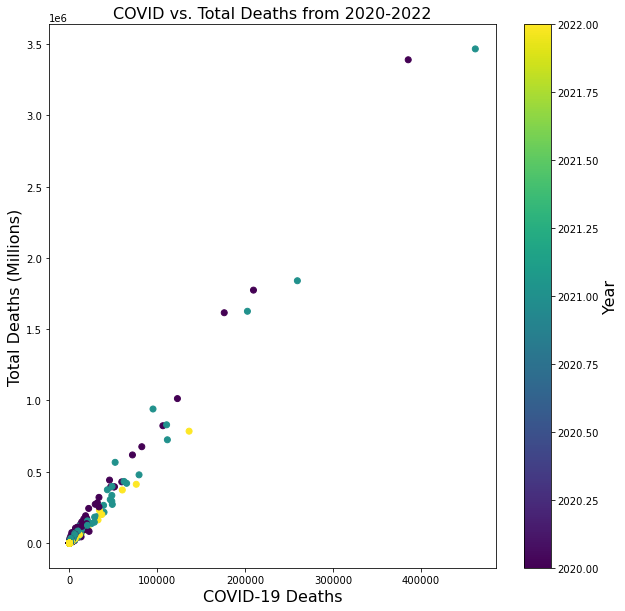

In [32]:
#Covid vs Total deaths
plt.figure(figsize=(10,10))
plt.scatter(year_df['COVID-19 Deaths'],year_df['Total Deaths'], c=year_df['Year'])
clb = plt.colorbar()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Total Deaths (Millions)")
plt.title("COVID vs. Total Deaths from 2020-2022")
clb.set_label("Year")
plt.savefig("Resources/Images/ScatterTotalvsCOVID.png")
plt.show()

The SEM value for the sample COVID-19 Deaths is 44.426791727537065


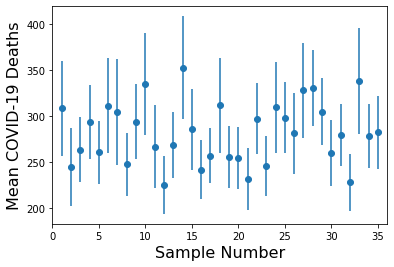

<Figure size 432x288 with 0 Axes>

In [33]:
new_month_df = month_df.dropna()
subset = new_month_df.sample(3000, random_state = 42)
sample = new_month_df.sample(3000)
print(f"The SEM value for the sample COVID-19 Deaths is {sem(sample['COVID-19 Deaths'])}")


covid_sample_set = [new_month_df.sample(3000) for x in range(0,35)]
means = [sample['COVID-19 Deaths'].mean() for sample in covid_sample_set]
standard_errors = [sem(sample['COVID-19 Deaths']) for sample in covid_sample_set]
x_axis = np.arange(0, len(covid_sample_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(covid_sample_set) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean COVID-19 Deaths")
plt.show()
plt.savefig("Resources/Images/SEMCOVID.png")

The SEM value for the sample Pneumonia Deaths is 27.86974196420925


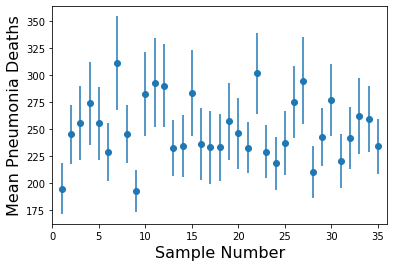

In [34]:
new_month_df = month_df.dropna()
subset = new_month_df.sample(3000, random_state = 42)
sample = new_month_df.sample(3000)
print(f"The SEM value for the sample Pneumonia Deaths is {sem(sample['Pneumonia Deaths'])}")

covid_sample_set = [new_month_df.sample(3000) for x in range(0,35)]
means = [sample['Pneumonia Deaths'].mean() for sample in covid_sample_set]
standard_errors = [sem(sample['Pneumonia Deaths']) for sample in covid_sample_set]
x_axis = np.arange(0, len(covid_sample_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(covid_sample_set) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean Pneumonia Deaths")
plt.savefig("Resources/Images/SEMPNA.png")
plt.show()

The SEM value for the sample Influenza Deaths is 0.6059702287719295


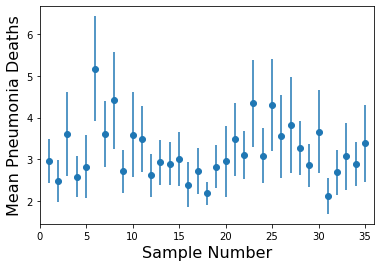

In [35]:
new_month_df = month_df.dropna()
subset = new_month_df.sample(3000, random_state = 42)
sample = new_month_df.sample(3000)
print(f"The SEM value for the sample Influenza Deaths is {sem(sample['Influenza Deaths'])}")

covid_sample_set = [new_month_df.sample(3000) for x in range(0,35)]
means = [sample['Influenza Deaths'].mean() for sample in covid_sample_set]
standard_errors = [sem(sample['Influenza Deaths']) for sample in covid_sample_set]
x_axis = np.arange(0, len(covid_sample_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(covid_sample_set) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean Pneumonia Deaths")
plt.savefig("Resources/Images/SEMFlu.png")
plt.show()

In [36]:
#Flu deaths by state/age
year_df["State"].unique()
year_df["Age Group"].unique()
x=year_df.groupby(["State","Age Group"])["Influenza Deaths"].count().reset_index()

x

,State,Age Group,Influenza Deaths
0,Alabama,1-4 years,7
1,Alabama,15-24 years,5
2,Alabama,25-34 years,6
3,Alabama,35-44 years,1
4,Alabama,45-54 years,5
...,...,...,...
631,Wyoming,65-74 years,6
632,Wyoming,75-84 years,7
633,Wyoming,85 years and over,3
634,Wyoming,All Ages,2


In [37]:
#2021 dataset
df_2021 = month_df[month_df.Year == 2021.0]
df_2021.head()

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11628,2021.0,1.0,United States,All Sexes,All Ages,105501.0,373600.0,69838.0,55399.0,144.0,120021.0
11629,2021.0,1.0,United States,All Sexes,Under 1 year,10.0,1676.0,15.0,0.0,0.0,25.0
11631,2021.0,1.0,United States,All Sexes,1-4 years,5.0,273.0,7.0,1.0,0.0,11.0
11632,2021.0,1.0,United States,All Sexes,5-14 years,17.0,435.0,15.0,4.0,1.0,29.0
11633,2021.0,1.0,United States,All Sexes,15-24 years,137.0,3110.0,99.0,60.0,0.0,176.0


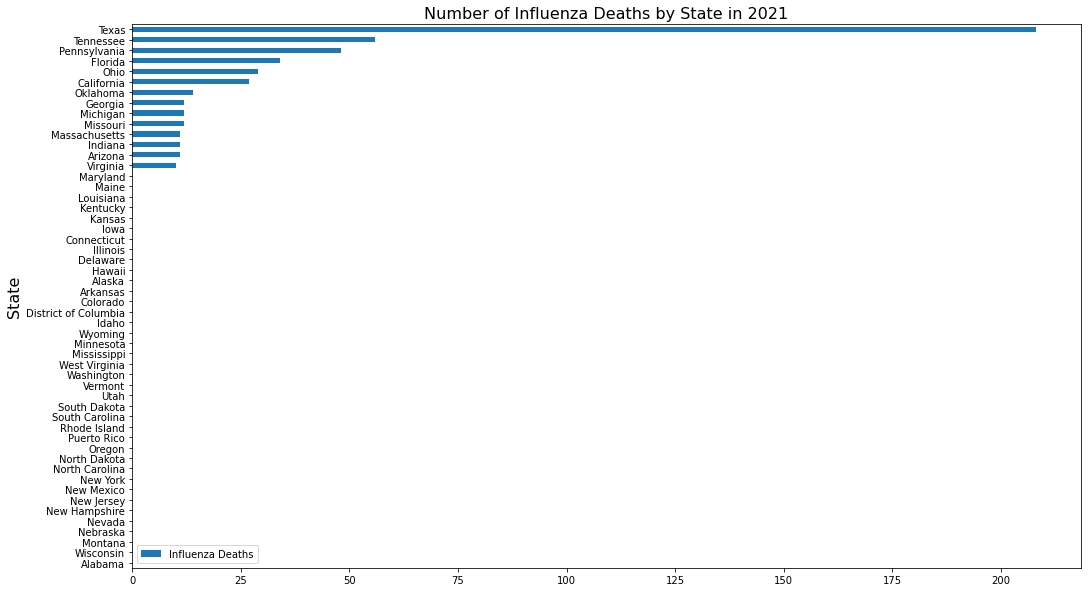

In [38]:
#influenza deaths in 2021
year_df["State"].unique()
year_df["Age Group"].unique()
i=df_2021.groupby(["State"])["Influenza Deaths"].sum().reset_index()
i.drop(i[i['State'] == "United States"].index, inplace = True)
i.sort_values('Influenza Deaths', ascending=True).plot.barh(x='State', title='Number of Influenza Deaths by State in 2021'
                                                            ,figsize=(17, 10))
plt.savefig("Resources/Images/InfluenzdeathsByState.png")

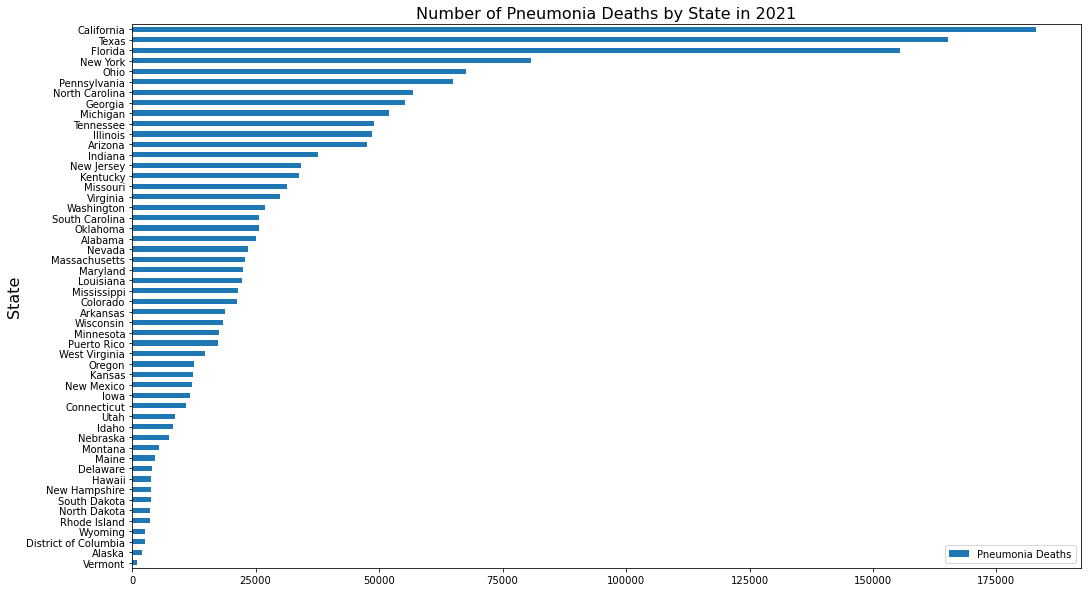

In [39]:
#Pneumonia Deaths in 2021
i=df_2021.groupby(["State"])["Pneumonia Deaths"].sum().reset_index()
i.drop(i[i['State'] == "United States"].index, inplace = True)
i.sort_values('Pneumonia Deaths', ascending=True).plot.barh(x='State', title='Number of Pneumonia Deaths by State in 2021'
                                                            ,figsize=(17, 10))
plt.savefig("Resources/Images/PneumoniadeathsByState.png")

<AxesSubplot:title={'center':'Number of Covid Deaths by Month'}, xlabel='Month', ylabel='Number of Deaths'>

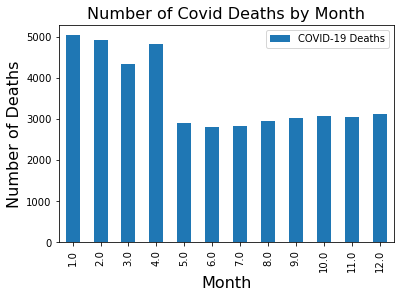

In [40]:
#Which months have the most deaths for Covid
month_df
month_df.head()

y=month_df.groupby("Month")["COVID-19 Deaths"].count().reset_index()
y
#covid deaths by month
y.plot.bar(x="Month", title='Number of Covid Deaths by Month',ylabel="Number of Deaths")


In [41]:
#creating bins for the seasons
bins=[0.0,4.0,7.0,10.0,12.0]
labels=["Winter","Spring","Summer","Fall"]
df_2021['Season'] = pd.cut(df_2021['Month'], bins=bins, labels=labels)

/var/folders/2m/3btzbqcn15d143__kkvb77f80000gn/T/ipykernel_4058/614430855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Season'] = pd.cut(df_2021['Month'], bins=bins, labels=labels)


In [42]:
df_2021.head()

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Season
11628,2021.0,1.0,United States,All Sexes,All Ages,105501.0,373600.0,69838.0,55399.0,144.0,120021.0,Winter
11629,2021.0,1.0,United States,All Sexes,Under 1 year,10.0,1676.0,15.0,0.0,0.0,25.0,Winter
11631,2021.0,1.0,United States,All Sexes,1-4 years,5.0,273.0,7.0,1.0,0.0,11.0,Winter
11632,2021.0,1.0,United States,All Sexes,5-14 years,17.0,435.0,15.0,4.0,1.0,29.0,Winter
11633,2021.0,1.0,United States,All Sexes,15-24 years,137.0,3110.0,99.0,60.0,0.0,176.0,Winter


In [43]:
df_binned_season=df_2021.groupby("Season")["COVID-19 Deaths"].sum().reset_index()
df_binned_season["COVID-19 Deaths (by thousands)"] = df_binned_season["COVID-19 Deaths"] / 1000
df_binned_season

,Season,COVID-19 Deaths,COVID-19 Deaths (by thousands)
0,Winter,1564366.0,1564.366
1,Spring,268057.0,268.057
2,Summer,1233100.0,1233.100
3,Fall,615933.0,615.933


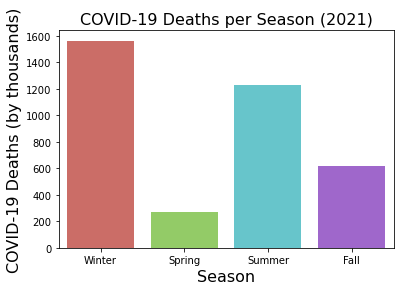

In [44]:
#binning per season
#Jan-March:Winter April-June:Spring July-September:Summer October-Decemeber:Fall


sns.barplot(x = 'Season', y = 'COVID-19 Deaths (by thousands)', data = df_binned_season ,
            palette="hls").set(title='COVID-19 Deaths per Season (2021)')
plt.savefig("Resources/Images/CovidDeathsperSeason.png")



Correlation Coefficient of Pneumonia and COVID-19 Deaths is 0.9985


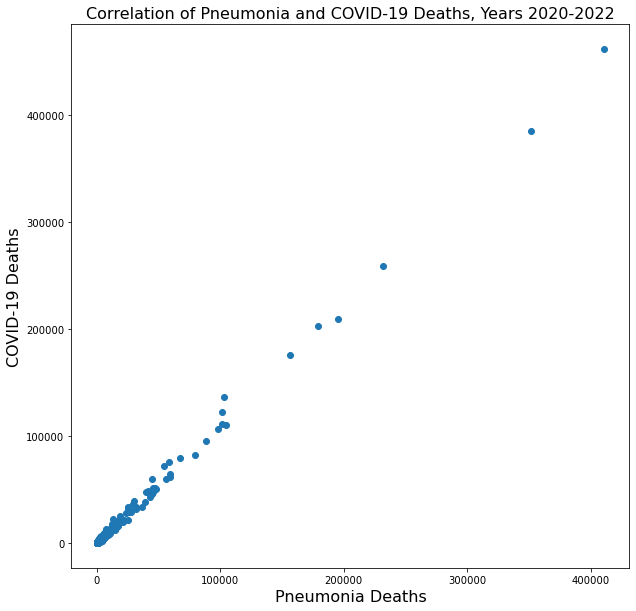

In [45]:

year_df.replace([np.inf, -np.inf], np.nan, inplace=True)
year_df.dropna(subset=["Pneumonia Deaths", "COVID-19 Deaths"], how="all", inplace = True)
year_df['COVID-19 Deaths'].value_counts()
plt.figure(figsize=(10,10))
plt.scatter(year_df['Pneumonia Deaths'], year_df['COVID-19 Deaths'])
plt.title('Correlation of Pneumonia and COVID-19 Deaths, Years 2020-2022')
plt.xlabel('Pneumonia Deaths')
plt.ylabel('COVID-19 Deaths')
plt.savefig('Resources/Images/pneumonia_covid_corr.png')
correlationpneumonia = year_df['Pneumonia Deaths'].corr(year_df['COVID-19 Deaths'])
print('Correlation Coefficient of Pneumonia and COVID-19 Deaths is ' + str(round(correlationpneumonia, 4)))




Correlation Coefficient of Influenza and COVID-19 Deaths is 0.724


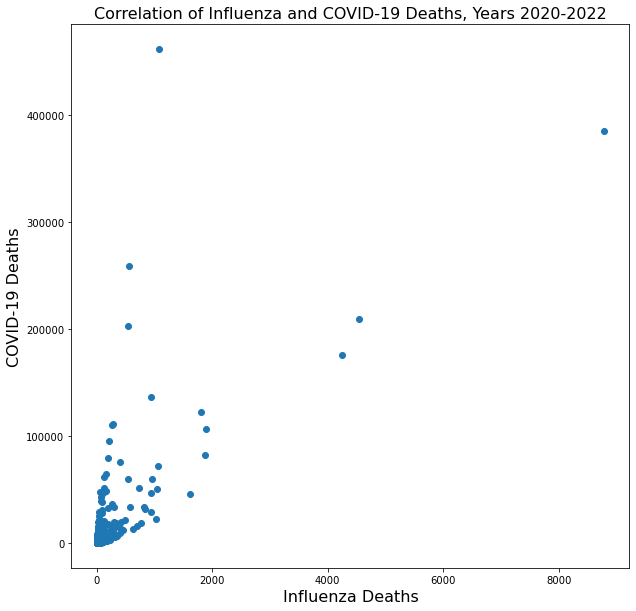

In [46]:
year_df.replace([np.inf, -np.inf], np.nan, inplace=True)
year_df.dropna(subset=["Influenza Deaths", "COVID-19 Deaths"], how="all")
plt.figure(figsize=(10,10))
plt.scatter(year_df['Influenza Deaths'], year_df['COVID-19 Deaths'])
plt.title('Correlation of Influenza and COVID-19 Deaths, Years 2020-2022')
plt.xlabel('Influenza Deaths')
plt.ylabel('COVID-19 Deaths')
plt.savefig('Resources/Images/influenza_covid_corr.png')
correlationflu = year_df['Influenza Deaths'].corr(year_df['COVID-19 Deaths'])
print('Correlation Coefficient of Influenza and COVID-19 Deaths is ' + str(round(correlationflu, 4)))
